# Project: TMDb Dataset Investigation
### by Ryan Sikhrangkur

***
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

***
<a id='intro'></a>
## Introduction
### Dataset Description
TMDb, or [The Movie Database](https://www.themoviedb.org), is an international, community-built database containing information on movies and TV shows since 2008. The dataset provided by TMDb for this project consists of more than 10,000 films, with features such as cast, genres, ratings, budget and revenue.

For this dataset there were three notes provided:
- Columns such as cast or genres are saved in the dataset as a string datatype, and use a pipe character to separate multiple names or values.
    - (e.g., *The Avengers* would have its cast saved as `Robert Downey Jr.|Chris Evans|Scarlet Johansson`).
- Several cast members contain special characters in their names that may not display properly, but will be left alone.
- The dataset includes columns named `budget_adj` and `revenue_adj` are adjustments to the budget and revenue column values respectively, accounting for inflation and projecting what the cost and profit of films would be if they released in the year 2010.

### Questions for Analysis
With some basic understanding of the data and the notes left on how to read it, I have two primary questions I feel should be asked:

<strong>1.</strong> Which films have earned the highest revenue before and after the 2010 inflation? 

<strong>2.</strong> Which directors have the highest average popularity? Would we say they tend to specialize their work with a limited cast or genre?

It should be stated of course that these questions may be altered or more questions for the analysis may arise as I continue the process.

***
<a id='wrangling'></a>
## Data Wrangling
### Gathering
Of course the first step to investigating the data would be to read the data and import all packages necessary.

In [1]:
# Import packages for data wrangling and exploration.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
# Load the dataset into a Pandas frame.
df_movies = pd.read_csv('tmdb-movies.csv')

### Assessment
Next I'll perform several operations to look at the dataset's size, shape, and column datatypes. I'll also be checking for missing, duplicate, or entries of zero where inappropriate.

In [3]:
# Print the first five values.
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Print an overview of the dataset.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Print the shape of the dataset (#rows, #columns).
df_movies.shape

(10866, 21)

In [6]:
# Print the datatype of columns displayed as 'object' in the dataset overview.
type(df_movies.imdb_id[0]), type(df_movies.cast[0]), type(df_movies.keywords[0]), type(df_movies.release_date[0])

(str, str, str, str)

In [7]:
# Print the number of null values in the dataset.
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# Print a count of duplicate entries in the dataset.
df_movies.duplicated().sum()

1

In [9]:
# Print a count of entries that have an illogical value of zero (budget, budget_adj, revenue, revenue_adj).
# Ideally we want n(budget=0) = n(budget_adj=0) and n(revenue=0) = n(revenue_adj=0).
print(df_movies[df_movies.budget==0].count()[0],
      df_movies[df_movies.budget_adj==0].count()[0],
      df_movies[df_movies.revenue==0].count()[0],
      df_movies[df_movies.revenue_adj==0].count()[0])

5696 5696 6016 6016


> Ideally for these counts we want `(budget = budget_adj) & (revenue = revenue_adj)`, where `budget, budget_adj, revenue, revenue_adj = 0`. 

In [10]:
# Print a count of entries that have an illogical value of zero (budget_adj, revenue_adj).
df_movies[df_movies.budget_adj==0].count()[0], df_movies[df_movies.revenue_adj==0].count()[0]

(5696, 6016)

In [11]:
# Print a count of entries that have a vote_count or vote_average of zero.
df_movies[df_movies.vote_count==0].count()[0], df_movies[df_movies.vote_average==0].count()[0]

(0, 0)

- The dataset has a total of 10,866 entries (rows) and 21 variables (columns). Of those rows one was a duplicate, and nine columns had missing data.
- All columns that has the dtype 'object' in the overview are str dtypes.
- The budget and revenue columns are int dtype, but the budget_adj and revenue_adj columns are float dtype.
- 5,696 rows have recorded zero budget and budget_adj, and 6,016 have recorded zero revenue and revenue_adj.

### Cleaning
Cleaning the data can be done in several steps following some manner of priority.

<strong>1.</strong> Null data must be addressed.

<strong>2.</strong> Improve structure quality of the dataset such as dropping unnecessary/redundant columns and correcting datatypes.

<strong>3.</strong> Remove duplicated entries.

<strong>4.</strong> Address inaccurate data such as budget and revenue values of zero.

#### 1. Remove entries with null values in the cast, director, genres, and production_companies columns.

In [12]:
# Remove entries will null values in columns of interest.
interest_columns = ['cast', 'director', 'genres', 'production_companies']
for col in interest_columns :
    df_movies = df_movies[~df_movies[col].isnull()]
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9773 non-null   int64  
 1   imdb_id               9771 non-null   object 
 2   popularity            9773 non-null   float64
 3   budget                9773 non-null   int64  
 4   revenue               9773 non-null   int64  
 5   original_title        9773 non-null   object 
 6   cast                  9773 non-null   object 
 7   homepage              2637 non-null   object 
 8   director              9773 non-null   object 
 9   tagline               7636 non-null   object 
 10  keywords              8667 non-null   object 
 11  overview              9773 non-null   object 
 12  runtime               9773 non-null   int64  
 13  genres                9773 non-null   object 
 14  production_companies  9773 non-null   object 
 15  release_date        

#### 2. Remove duplicated entries from the dataset.

In [13]:
# Remove duplicated entries from the dataset.
df_movies.drop_duplicates(inplace=True)
df_movies.duplicated().sum()

0

#### 3. Drop the imdb_id, homepage, tagline, keywords, overview, and release_date columns.

In [14]:
# Drop unrelated and redundant columns.
df_movies.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date'],
               axis=1, inplace=True)
# Reorder remaining columns for better legibility.
df_movies = df_movies[['original_title', 'release_year', 'runtime', 'production_companies',
                       'director', 'cast', 'genres', 'popularity', 'vote_average', 'vote_count',
                      'budget', 'budget_adj', 'revenue', 'revenue_adj']]
df_movies.head()

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
0,Jurassic World,2015,124,Universal Studios|Amblin Entertainment|Legenda...,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,32.985763,6.5,5562,150000000,1.379999e+08,1513528810,1.392446e+09
1,Mad Max: Fury Road,2015,120,Village Roadshow Pictures|Kennedy Miller Produ...,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,28.419936,7.1,6185,150000000,1.379999e+08,378436354,3.481613e+08
2,Insurgent,2015,119,Summit Entertainment|Mandeville Films|Red Wago...,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,13.112507,6.3,2480,110000000,1.012000e+08,295238201,2.716190e+08
3,Star Wars: The Force Awakens,2015,136,Lucasfilm|Truenorth Productions|Bad Robot,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,11.173104,7.5,5292,200000000,1.839999e+08,2068178225,1.902723e+09
4,Furious 7,2015,137,Universal Pictures|Original Film|Media Rights ...,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,9.335014,7.3,2947,190000000,1.747999e+08,1506249360,1.385749e+09


#### 4. Correct column datatypes for budget and revenue.

In [15]:
# Convert the budget and revenue columns to dtype float.
df_movies.budget = df_movies.budget.astype('float')
df_movies.revenue = df_movies.revenue.astype('float')
df_movies.head()

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
0,Jurassic World,2015,124,Universal Studios|Amblin Entertainment|Legenda...,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,32.985763,6.5,5562,150000000.0,1.379999e+08,1.513529e+09,1.392446e+09
1,Mad Max: Fury Road,2015,120,Village Roadshow Pictures|Kennedy Miller Produ...,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,28.419936,7.1,6185,150000000.0,1.379999e+08,3.784364e+08,3.481613e+08
2,Insurgent,2015,119,Summit Entertainment|Mandeville Films|Red Wago...,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,13.112507,6.3,2480,110000000.0,1.012000e+08,2.952382e+08,2.716190e+08
3,Star Wars: The Force Awakens,2015,136,Lucasfilm|Truenorth Productions|Bad Robot,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,11.173104,7.5,5292,200000000.0,1.839999e+08,2.068178e+09,1.902723e+09
4,Furious 7,2015,137,Universal Pictures|Original Film|Media Rights ...,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,9.335014,7.3,2947,190000000.0,1.747999e+08,1.506249e+09,1.385749e+09


#### 5. Separate column values in the production_companies, director, cast, and genres columns.

In [16]:
# Split column values with the | character using a loop.
for col in interest_columns :
    df_movies[col] = df_movies[col].str.split("|")
df_movies.head()

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
0,Jurassic World,2015,124,"[Universal Studios, Amblin Entertainment, Lege...",[Colin Trevorrow],"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[Action, Adventure, Science Fiction, Thriller]",32.985763,6.5,5562,150000000.0,1.379999e+08,1.513529e+09,1.392446e+09
1,Mad Max: Fury Road,2015,120,"[Village Roadshow Pictures, Kennedy Miller Pro...",[George Miller],"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...","[Action, Adventure, Science Fiction, Thriller]",28.419936,7.1,6185,150000000.0,1.379999e+08,3.784364e+08,3.481613e+08
2,Insurgent,2015,119,"[Summit Entertainment, Mandeville Films, Red W...",[Robert Schwentke],"[Shailene Woodley, Theo James, Kate Winslet, A...","[Adventure, Science Fiction, Thriller]",13.112507,6.3,2480,110000000.0,1.012000e+08,2.952382e+08,2.716190e+08
3,Star Wars: The Force Awakens,2015,136,"[Lucasfilm, Truenorth Productions, Bad Robot]",[J.J. Abrams],"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...","[Action, Adventure, Science Fiction, Fantasy]",11.173104,7.5,5292,200000000.0,1.839999e+08,2.068178e+09,1.902723e+09
4,Furious 7,2015,137,"[Universal Pictures, Original Film, Media Righ...",[James Wan],"[Vin Diesel, Paul Walker, Jason Statham, Miche...","[Action, Crime, Thriller]",9.335014,7.3,2947,190000000.0,1.747999e+08,1.506249e+09,1.385749e+09


#### 6. Correct the values of zero in the budget, revenue, budget_adj, and revenue_adj columns.

In [17]:
# Replace all zero values using a loop.
col_zeroes = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
for col in col_zeroes :
    df_movies[col] = df_movies[col].replace(0, np.nan)
    df_movies[col] = df_movies[col].fillna(df_movies.groupby('release_year')[col].transform('mean'))

In [18]:
# Review the information of the dataset after all cleaning is completed.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        9772 non-null   object 
 1   release_year          9772 non-null   int64  
 2   runtime               9772 non-null   int64  
 3   production_companies  9772 non-null   object 
 4   director              9772 non-null   object 
 5   cast                  9772 non-null   object 
 6   genres                9772 non-null   object 
 7   popularity            9772 non-null   float64
 8   vote_average          9772 non-null   float64
 9   vote_count            9772 non-null   int64  
 10  budget                9772 non-null   float64
 11  budget_adj            9772 non-null   float64
 12  revenue               9772 non-null   float64
 13  revenue_adj           9772 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.1+ MB


***
<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What were the most profitable films before and after the 2010 inflation? Do they have any properties in common?
For this question I'll create two sets 25 films with the highest revenue, one group will consist of films released before 2010 and the other released during 2010 and after.

Once the sets are created we can explore what they may or may not have in common, and see if there is anything we can attribute to their success.

In [19]:
# Create two datasets of the top 25 films, one for films before 2010 and another in and after 2010.
before_top = df_movies[df_movies.release_year < 2010].sort_values('revenue', ascending=False).head(25)
after_top = df_movies[df_movies.release_year >= 2010].sort_values('revenue', ascending=False).head(25)

before_top

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
1386,Avatar,2009,162,"[Ingenious Film Partners, Twentieth Century Fo...",[James Cameron],"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]",9.432768,7.1,8458,237000000.0,2.408869e+08,2.781506e+09,2.827124e+09
5231,Titanic,1997,194,"[Paramount Pictures, Twentieth Century Fox Fil...",[James Cameron],"[Kate Winslet, Leonardo DiCaprio, Frances Fish...","[Drama, Romance, Thriller]",4.355219,7.3,4654,200000000.0,2.716921e+08,1.845034e+09,2.506406e+09
4949,The Lord of the Rings: The Return of the King,2003,201,"[WingNut Films, New Line Cinema]",[Peter Jackson],"[Elijah Wood, Ian McKellen, Viggo Mortensen, L...","[Adventure, Fantasy, Action]",7.122455,7.9,5636,94000000.0,1.114231e+08,1.118889e+09,1.326278e+09
8094,The Net,1995,114,[Columbia Pictures],[Irwin Winkler],"[Sandra Bullock, Jeremy Northam, Dennis Miller...","[Crime, Drama, Mystery, Thriller, Action]",1.136610,5.6,201,22000000.0,3.148127e+07,1.106280e+09,1.583050e+09
6555,Pirates of the Caribbean: Dead Man's Chest,2006,151,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[Gore Verbinski],"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]",4.205992,6.8,3181,200000000.0,2.163338e+08,1.065660e+09,1.152691e+09
2875,The Dark Knight,2008,152,"[DC Comics, Legendary Pictures, Warner Bros., ...",[Christopher Nolan],"[Christian Bale, Michael Caine, Heath Ledger, ...","[Drama, Action, Crime, Thriller]",8.466668,8.1,8432,185000000.0,1.873655e+08,1.001922e+09,1.014733e+09
2634,Harry Potter and the Philosopher's Stone,2001,152,"[1492 Pictures, Warner Bros., Heyday Films]",[Chris Columbus],"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[Adventure, Fantasy, Family]",8.021423,7.2,4265,125000000.0,1.539360e+08,9.764756e+08,1.202518e+09
7387,Pirates of the Caribbean: At World's End,2007,169,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[Gore Verbinski],"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]",4.965391,6.8,2626,300000000.0,3.155006e+08,9.610000e+08,1.010654e+09
7388,Harry Potter and the Order of the Phoenix,2007,138,"[Cool Music, Warner Bros., Heyday Films, Harry...",[David Yates],"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[Adventure, Fantasy, Family, Mystery]",4.878162,7.2,3382,150000000.0,1.577503e+08,9.382127e+08,9.866889e+08
1389,Harry Potter and the Half-Blood Prince,2009,153,"[Warner Bros., Heyday Films]",[David Yates],"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[Adventure, Fantasy, Family]",5.076472,7.3,3220,250000000.0,2.541001e+08,9.339592e+08,9.492765e+08


In [20]:
after_top

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
3,Star Wars: The Force Awakens,2015,136,"[Lucasfilm, Truenorth Productions, Bad Robot]",[J.J. Abrams],"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...","[Action, Adventure, Science Fiction, Fantasy]",11.173104,7.5,5292,200000000.0,1.839999e+08,2.068178e+09,1.902723e+09
4361,The Avengers,2012,143,[Marvel Studios],[Joss Whedon],"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...","[Science Fiction, Action, Adventure]",7.637767,7.3,8903,220000000.0,2.089437e+08,1.519558e+09,1.443191e+09
0,Jurassic World,2015,124,"[Universal Studios, Amblin Entertainment, Lege...",[Colin Trevorrow],"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[Action, Adventure, Science Fiction, Thriller]",32.985763,6.5,5562,150000000.0,1.379999e+08,1.513529e+09,1.392446e+09
4,Furious 7,2015,137,"[Universal Pictures, Original Film, Media Righ...",[James Wan],"[Vin Diesel, Paul Walker, Jason Statham, Miche...","[Action, Crime, Thriller]",9.335014,7.3,2947,190000000.0,1.747999e+08,1.506249e+09,1.385749e+09
14,Avengers: Age of Ultron,2015,141,"[Marvel Studios, Prime Focus, Revolution Sun S...",[Joss Whedon],"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...","[Action, Adventure, Science Fiction]",5.944927,7.4,4304,280000000.0,2.575999e+08,1.405036e+09,1.292632e+09
3374,Harry Potter and the Deathly Hallows: Part 2,2011,130,"[Warner Bros., Heyday Films, Moving Picture Co...",[David Yates],"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[Adventure, Family, Fantasy]",5.711315,7.7,3750,125000000.0,1.211748e+08,1.327818e+09,1.287184e+09
5422,Frozen,2013,102,"[Walt Disney Pictures, Walt Disney Animation S...","[Chris Buck, Jennifer Lee]","[Kristen Bell, Idina Menzel, Jonathan Groff, J...","[Animation, Adventure, Family]",6.112766,7.5,3369,150000000.0,1.404050e+08,1.274219e+09,1.192711e+09
5425,Iron Man 3,2013,130,[Marvel Studios],[Shane Black],"[Robert Downey Jr., Gwyneth Paltrow, Guy Pearc...","[Action, Adventure, Science Fiction]",4.946136,6.9,6882,200000000.0,1.872067e+08,1.215440e+09,1.137692e+09
8,Minions,2015,91,"[Universal Pictures, Illumination Entertainment]","[Kyle Balda, Pierre Coffin]","[Sandra Bullock, Jon Hamm, Michael Keaton, All...","[Family, Animation, Adventure, Comedy]",7.404165,6.5,2893,74000000.0,6.807997e+07,1.156731e+09,1.064192e+09
3522,Transformers: Dark of the Moon,2011,154,"[Paramount Pictures, Di Bonaventura Pictures, ...",[Michael Bay],"[Shia LaBeouf, John Malkovich, Ken Jeong, Fran...","[Action, Science Fiction, Adventure]",0.760503,6.1,2456,195000000.0,1.890326e+08,1.123747e+09,1.089358e+09


With our top 50 films we can start looking at their attributes and see what they have in common.

Because we asked for films of the highest revenues from before and after 2010, let's compare revenues and margin gains as well as what those numbers would be under the adjustment.

In [21]:
mov_labels = []
for i in range(0, len(before_top)) :
    mov_labels.append(before_top['original_title'].tolist()[i] + '\n'
                      + after_top['original_title'].tolist()[i])

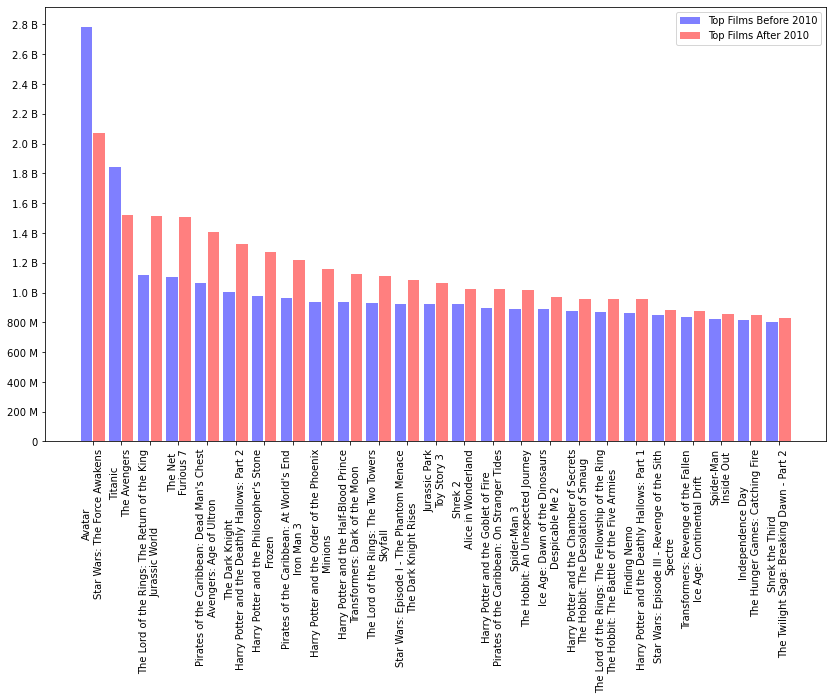

In [22]:
ind = np.arange(25)
width = 0.45
locations = ind+width / 2
plt.figure(figsize=(14,8))
blue_bars = plt.bar(ind, before_top['revenue'], width-0.05, color='b', alpha=.5,
                     label='Top Films Before 2010')
red_bars = plt.bar(ind+width, after_top['revenue'], width-0.05, color='r', alpha=.5,
                   label='Top Films After 2010')
plt.xticks(locations, mov_labels, rotation=90)
plt.yticks(np.arange(0,3e9,2e8), [0,'200 M','400 M','600 M','800 M','1.0 B','1.2 B','1.4 B','1.6 B','1.8 B','2.0 B',
                                    '2.2 B','2.4 B','2.6 B','2.8 B'])
plt.legend();

Except for the top two films, all films released after 2010 have earned a higher revenue than films released before.

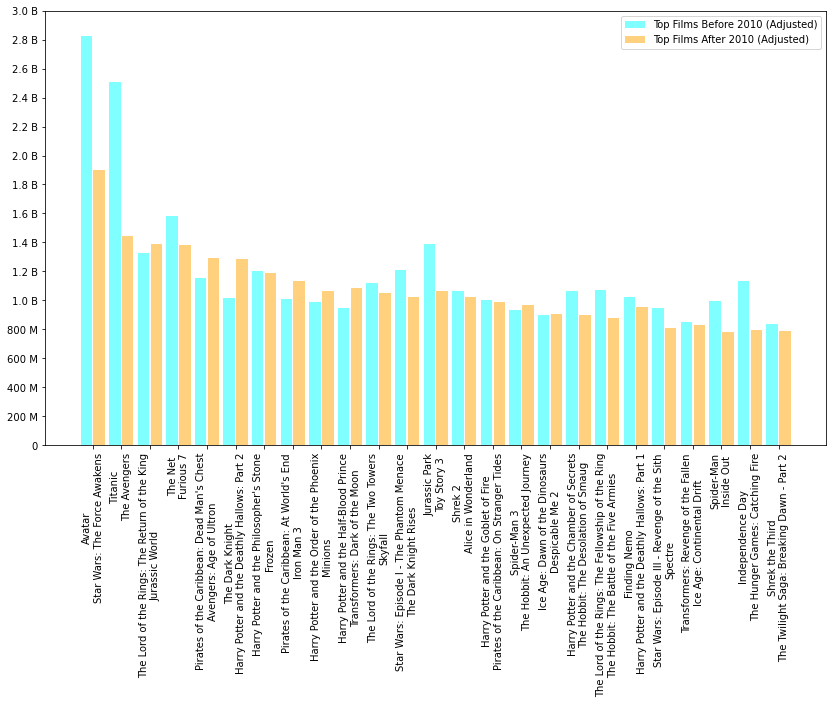

In [23]:
ind = np.arange(25)
width = 0.45
locations = ind+width / 2
plt.figure(figsize=(14,8))
blue_bars = plt.bar(ind, before_top['revenue_adj'], width-0.05, color='cyan', alpha=.5,
                     label='Top Films Before 2010 (Adjusted)')
red_bars = plt.bar(ind+width, after_top['revenue_adj'], width-0.05, color='orange', alpha=.5,
                   label='Top Films After 2010 (Adjusted)')
plt.xticks(locations, mov_labels, rotation=90)
plt.yticks(np.arange(0,3.001e9,2e8), [0,'200 M','400 M','600 M','800 M','1.0 B','1.2 B','1.4 B','1.6 B','1.8 B','2.0 B',
                                    '2.2 B','2.4 B','2.6 B','2.8 B','3.0 B'])
plt.legend();

Looking at the revenue_adj, the values become much less consistent. The top two films from before 2010 have a greater difference more than the top two films from after 2010.

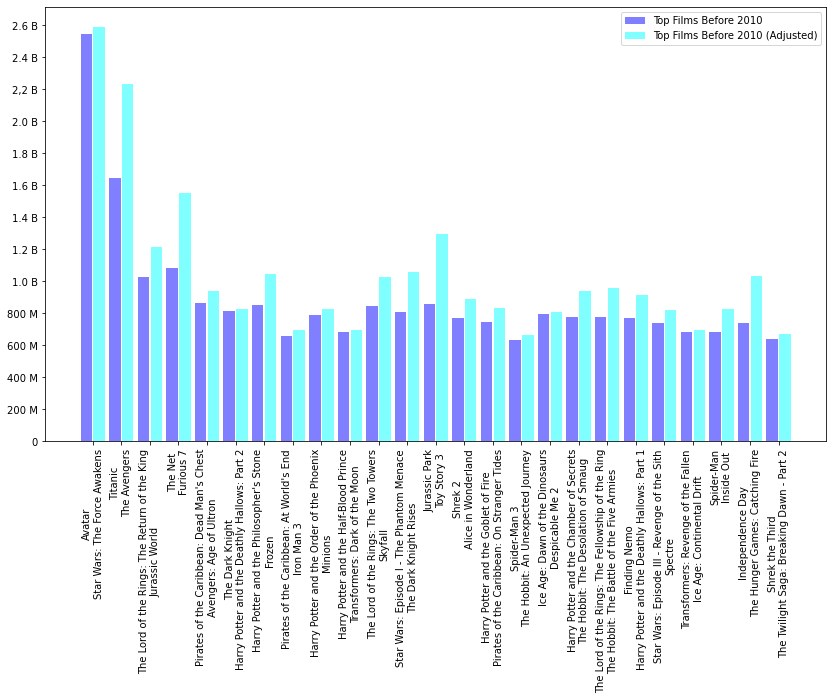

In [24]:
ind = np.arange(25)
width = 0.45
locations = ind+width / 2
plt.figure(figsize=(14,8))
blue_bars = plt.bar(ind, (before_top['revenue']-before_top['budget']), width-0.05, color='b', alpha=.5,
                     label='Top Films Before 2010')
red_bars = plt.bar(ind+width, (before_top['revenue_adj']-before_top['budget_adj']), width-0.05, color='cyan', alpha=.5,
                   label='Top Films Before 2010 (Adjusted)')
plt.xticks(locations, mov_labels, rotation=90)
plt.yticks(np.arange(0,2.8e9,2e8), [0,'200 M','400 M','600 M','800 M','1.0 B','1.2 B','1.4 B','1.6 B','1.8 B','2.0 B', '2,2 B',
                                    '2.4 B','2.6 B'])
plt.legend();

Every film from the before_top dataset has a greater revenue_adj than their revenue.

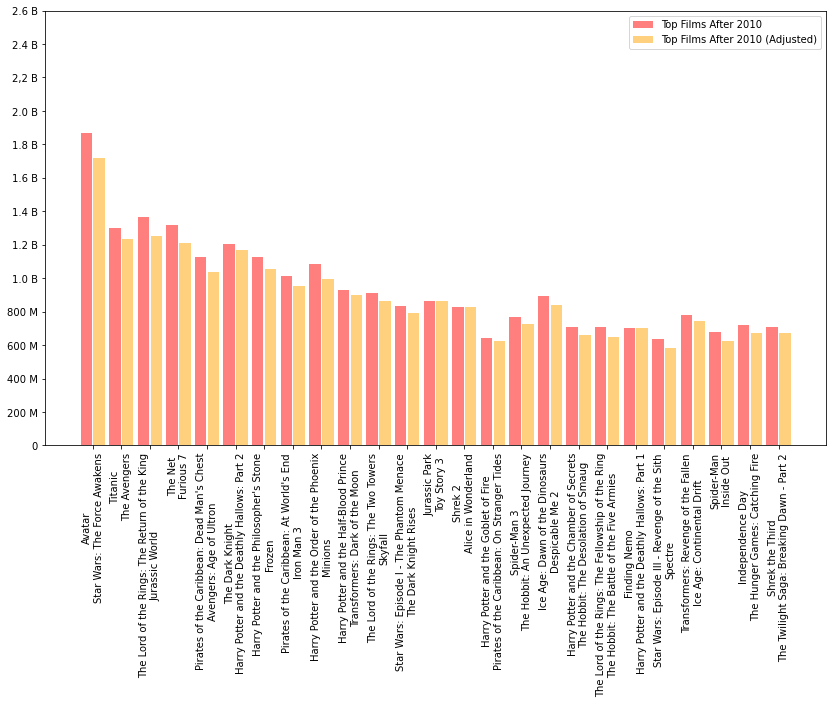

In [25]:
ind = np.arange(25)
width = 0.45
locations = ind+width / 2
plt.figure(figsize=(14,8))
blue_bars = plt.bar(ind, (after_top['revenue']-after_top['budget']), width-0.05, color='r', alpha=.5,
                     label='Top Films After 2010')
red_bars = plt.bar(ind+width, (after_top['revenue_adj']-after_top['budget_adj']), width-0.05, color='orange', alpha=.5,
                   label='Top Films After 2010 (Adjusted)')
plt.xticks(locations, mov_labels, rotation=90)
plt.yticks(np.arange(0,2.8e9,2e8), [0,'200 M','400 M','600 M','800 M','1.0 B','1.2 B','1.4 B','1.6 B','1.8 B','2.0 B', '2,2 B',
                                    '2.4 B','2.6 B'])
plt.legend();

Every film from the after_top dataset has a lower revenue_adj than revenue.

In [26]:
before_top['genres'].explode().value_counts(), before_top['genres'].explode().value_counts().sum()

(Adventure          20
 Fantasy            15
 Action             14
 Family              9
 Science Fiction     6
 Animation           4
 Drama               3
 Comedy              3
 Thriller            3
 Crime               2
 Mystery             2
 Romance             1
 Name: genres, dtype: int64,
 82)

In [27]:
after_top['genres'].explode().value_counts(), after_top['genres'].explode().value_counts().sum()

(Adventure          20
 Action             13
 Fantasy             9
 Family              9
 Science Fiction     7
 Animation           6
 Thriller            5
 Comedy              5
 Crime               3
 Drama               2
 Romance             1
 Name: genres, dtype: int64,
 80)

In [28]:
top_genres = sorted(np.unique(np.concatenate((before_top['genres'].explode().unique(), after_top['genres'].explode().unique()), 0)))
before_gcount = before_top['genres'].explode().value_counts()
after_gcount = after_top['genres'].explode().value_counts()

g_index = []
g_value = []
for genre in top_genres :
    if genre not in before_gcount.index :
        g_index.append(genre)
        g_value.append(0)
before_gcount = before_gcount.append(pd.Series(data=g_value, index=g_index)).sort_index(ascending=True)

g_index.clear()
g_value.clear()
for genre in top_genres:
    if genre not in after_gcount.index :
        g_index.append(genre)
        g_value.append(0)
after_gcount = after_gcount.append(pd.Series(data=g_value, index=g_index)).sort_index(ascending=True)

<ipython-input-28-364f48fb8c7d>:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  before_gcount = before_gcount.append(pd.Series(data=g_value, index=g_index)).sort_index(ascending=True)


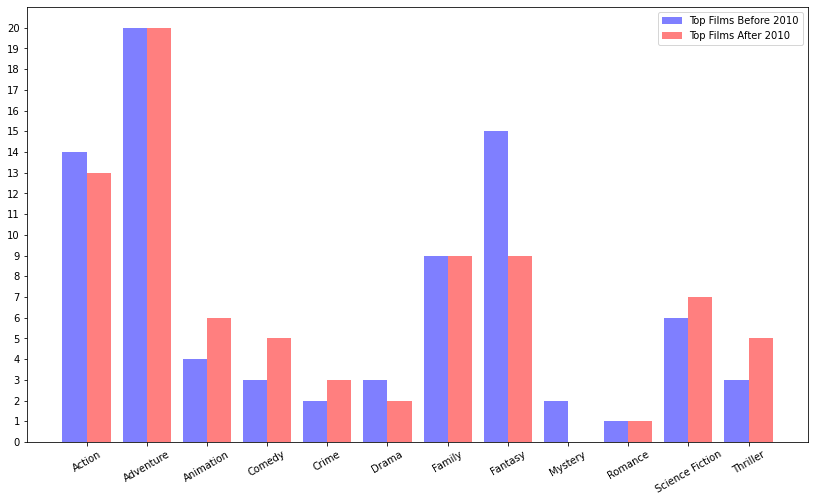

In [29]:
ind = np.arange(len(top_genres))
width = 0.4
plt.figure(figsize=(14,8))
blue_bars = plt.bar(ind, before_gcount, width, color='b', alpha=.5, label='Top Films Before 2010')
red_bars = plt.bar(ind+width, after_gcount, width, color='r', alpha=.5, label='Top Films After 2010')
locations = ind+width / 2
plt.xticks(locations, top_genres, rotation=30)
plt.yticks(np.arange(0, 21, 1))
plt.legend();

80% of both datasets were adventure films.

In [30]:
before_top['runtime'].min(), before_top['runtime'].max()

(93, 201)

In [31]:
after_top['runtime'].min(), after_top['runtime'].max()

(88, 169)

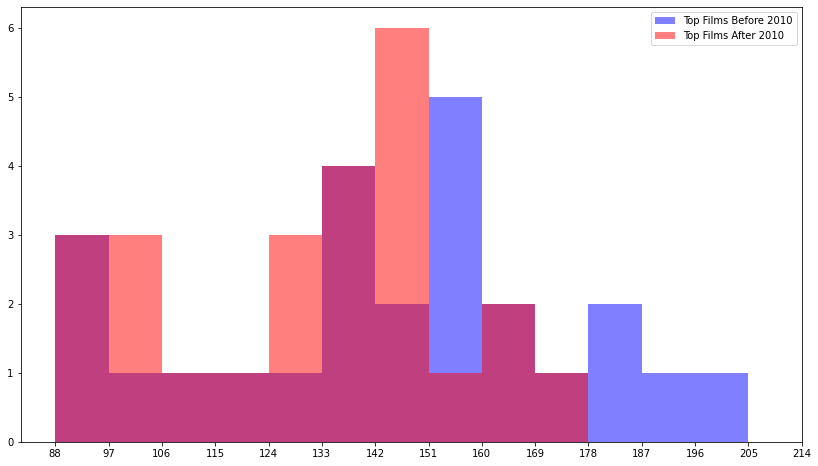

In [32]:
plt.figure(figsize=(14,8))
binsize=9
bins = np.arange(after_top['runtime'].min(),before_top['runtime'].max()+binsize, binsize)
before_time = plt.hist(before_top['runtime'], bins=bins, color='b', alpha=0.5, label='Top Films Before 2010')
after_time = plt.hist(after_top['runtime'], bins=bins, color='r', alpha=0.5, label='Top Films After 2010')
plt.xticks(np.arange(88,223,binsize))
plt.yticks(np.arange(0,7,1))
plt.legend();

With 13 bins with a binsize of 9, there are 17 films from both datasets with the same runtime with most ranging between 133-142 minutes and 88-97 minutes.

The mode for before_top runtimes is 151-160 minutes, while the mode for after_top runtimes is 142-151 minutes.

The majority of after_top films have a shorter runtime than most before_top films.

No handles with labels found to put in legend.


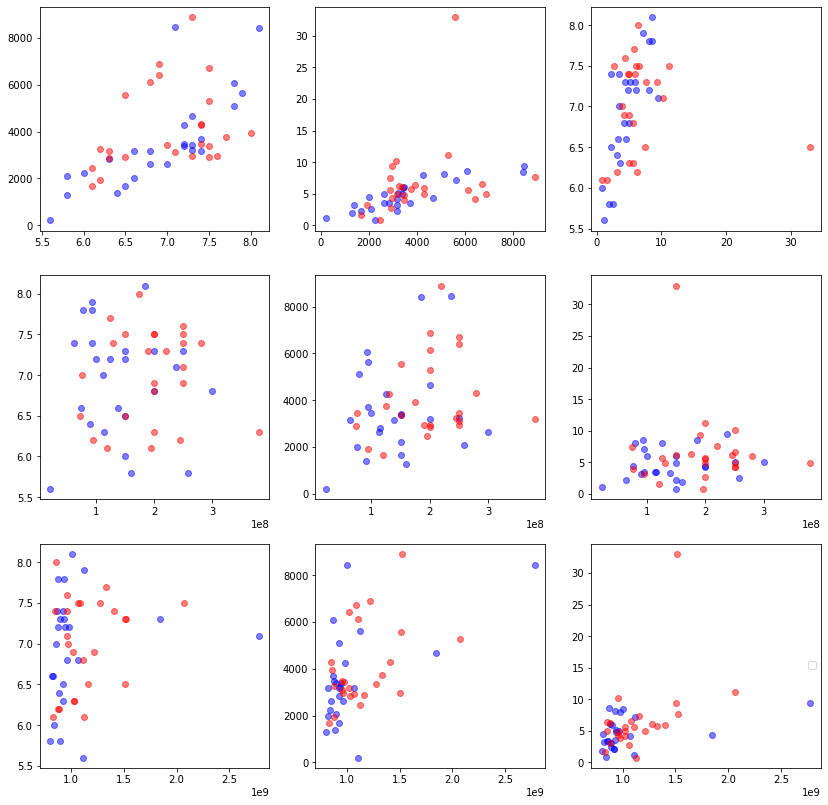

In [33]:
# num_vars = ['vote_average', 'vote_count', 'popularity', 'vote_average']
# rows = 3
# cols = 3

plt.figure(figsize=(14,14))

# for i in range(1,4) 
#     plt.subplot(3,3,i)
#     before_plot = plt.scatter(before_top[num_vars[i-1]], before_top[num_vars[i]], color='b', alpha=.5)
#     after_plot = plt.scatter(before_top[num_vars[i-1]], before_top[num_vars[i]], color='r', alpha=.5)
    
plt.subplot(3,3,1)
before_meancount = plt.scatter(before_top['vote_average'], before_top['vote_count'], color='b', alpha=.5)
after_meancount = plt.scatter(after_top['vote_average'], after_top['vote_count'], color='r', alpha=.5)

plt.subplot(3,3,2)
before_popcount = plt.scatter(before_top['vote_count'], before_top['popularity'], color='b', alpha=.5)
after_popcount = plt.scatter(after_top['vote_count'], after_top['popularity'], color='r', alpha=.5)

plt.subplot(3,3,3)
before_popmean = plt.scatter(before_top['popularity'], before_top['vote_average'], color='b', alpha=.5)
after_popmean = plt.scatter(after_top['popularity'], after_top['vote_average'], color='r', alpha=.5)

plt.subplot(3,3,4)
before_budgmean = plt.scatter(before_top['budget'], before_top['vote_average'], color='b', alpha=.5)
after_budgmean = plt.scatter(after_top['budget'], after_top['vote_average'], color='r', alpha=.5)

plt.subplot(3,3,5)
before_budgcount = plt.scatter(before_top['budget'], before_top['vote_count'], color='b', alpha=.5)
after_budgcount= plt.scatter(after_top['budget'], after_top['vote_count'], color='r', alpha=.5)

plt.subplot(3,3,6)
before_budgpop = plt.scatter(before_top['budget'], before_top['popularity'], color='b', alpha=.5)
after_budgpop = plt.scatter(after_top['budget'], after_top['popularity'], color='r', alpha=.5)

plt.subplot(3,3,7)
before_revmean = plt.scatter(before_top['revenue'], before_top['vote_average'], color='b', alpha=.5)
after_revmean = plt.scatter(after_top['revenue'], after_top['vote_average'], color='r', alpha=.5)

plt.subplot(3,3,8)
before_revcount = plt.scatter(before_top['revenue'], before_top['vote_count'], color='b', alpha=.5)
after_revcount = plt.scatter(after_top['revenue'], after_top['vote_count'], color='r', alpha=.5)

plt.subplot(3,3,9)
before_revpop = plt.scatter(before_top['revenue'], before_top['popularity'], color='b', alpha=.5)
after_revpop = plt.scatter(after_top['revenue'], after_top['popularity'], color='r', alpha=.5)

plt.legend(bbox_to_anchor=(1,0.5));

By looking at the relationships of numeric values in both datasets, it appears there's no correlation for any except vote_average vs. vote_count.

#### Question 1 Summary
We obtained the top 25 films of before and after the year 2010, and compared to see how each dataset was affected by the dataset's inflation adjustment.

The revenue of the first two films in before_top have a greater revenue than the first two films in after_top, and after_top had greater revenue for the remaining 23. When observing how the inflation adjustment influences each dataset, the before_top has a higher revenue_adj than revenue while the opposite is true for after_top. When comparing the revenue_adj of the two datasets, the results become more mixed whether the before_top film or after_top film has the greater value.

After comparing the genres of these films, 90% of the after_top's genre distribution is the same as before_top's distribution. 80% of both datasets are films of the adventure genre, and half are of the action genre.

17 of 25, or 68%, of the films in before_top and after_top have the same runtime range. It's also worth mentioning that the mode of runtime for more recent films has decreased to the ranges of 133-151 minutes, whereas before_top has a mode range of 151-160 minutes and goes as high as the 196-205 minute range.

Several scatterplots were created to discern whether the three public reception values - popularity, vote_average and vote_count - had any correlation, as well as if these three had any correlation with the budget or revenue of the film. It can be observed from these plots that only vote_average and vote_count have a moderately-positive correlation whereas the rest have no apparent relationship.

### Question 2: Which directors have the highest average popularity? Would we say they tend to specialize their work with a limited cast or genre?

For this question we'll gather ten directors who have the highest average popularity credited for the films they've been credited for.

To consider specialization, we'll look at several attributes of the films these directors worked on for similarities - whether they are known to work with a specific production company or cast, direct a specific genre of film, etc.. This question does not need to be answered for any directors who are credited for only one film.

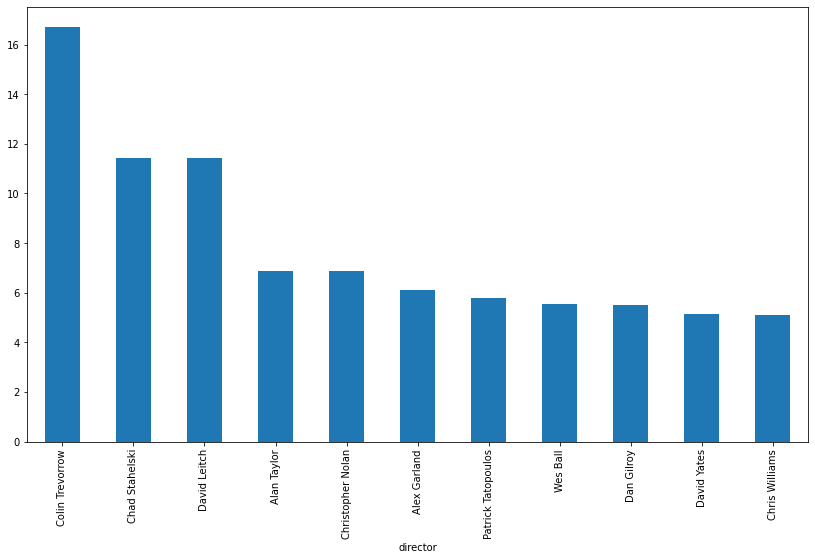

In [34]:
dir_explode = df_movies.explode('director')
top_directors = dir_explode.groupby('director')['popularity'].mean().nlargest(11)
top_directors.plot(kind='bar', figsize=(14,8));

While the question asked for ten directors I gathered the names of 11 instead. My reason will become apparent shortly.

In [35]:
# Colin Trevorrow
ct_movies = dir_explode[dir_explode.director=='Colin Trevorrow']
ct_movies

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
0,Jurassic World,2015,124,"[Universal Studios, Amblin Entertainment, Lege...",Colin Trevorrow,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[Action, Adventure, Science Fiction, Thriller]",32.985763,6.5,5562,150000000.0,1.379999e+08,1.513529e+09,1.392446e+09
4604,Safety Not Guaranteed,2012,85,"[Duplass Brothers Productions, Big Beach Films]",Colin Trevorrow,"[Aubrey Plaza, Mark Duplass, Jake Johnson, Kar...","[Comedy, Romance, Science Fiction, Drama]",0.408010,6.7,341,750000.0,7.123082e+05,4.007792e+06,3.806378e+06


In [36]:
ct_movies['production_companies'].explode().value_counts() / len(ct_movies)

Amblin Entertainment            0.5
Fuji Television Network         0.5
Universal Studios               0.5
Legendary Pictures              0.5
Duplass Brothers Productions    0.5
Big Beach Films                 0.5
Dentsu                          0.5
Name: production_companies, dtype: float64

In [37]:
ct_movies['cast'].explode().value_counts() / len(ct_movies)

Jenica Bergere         0.5
Mark Duplass           0.5
Chris Pratt            0.5
Aubrey Plaza           0.5
Bryce Dallas Howard    0.5
Nick Robinson          0.5
Jake Johnson           0.5
Karan Soni             0.5
Irrfan Khan            0.5
Vincent D'Onofrio      0.5
Name: cast, dtype: float64

In [38]:
ct_movies['genres'].explode().value_counts() / len(ct_movies)

Science Fiction    1.0
Adventure          0.5
Action             0.5
Thriller           0.5
Drama              0.5
Romance            0.5
Comedy             0.5
Name: genres, dtype: float64

Colin Trevorrow is credited with two films and both belong in the science fiction genre, but otherwise have no similarity.

In [39]:
# Chad Stahelski
cs_movies = dir_explode[dir_explode.director=='Chad Stahelski']
cs_movies

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
632,John Wick,2014,101,"[Thunder Road Pictures, Warner Bros., 87Eleven...",Chad Stahelski,"[Keanu Reeves, Michael Nyqvist, Alfie Allen, W...","[Action, Thriller]",11.422751,7.0,2712,20000000.0,1.842182e+07,78739897.0,7.252661e+07


In [40]:
# David Leitch
dl_movies = dir_explode[dir_explode.director=='David Leitch']
dl_movies

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
632,John Wick,2014,101,"[Thunder Road Pictures, Warner Bros., 87Eleven...",David Leitch,"[Keanu Reeves, Michael Nyqvist, Alfie Allen, W...","[Action, Thriller]",11.422751,7.0,2712,20000000.0,1.842182e+07,78739897.0,7.252661e+07


As we can see, Chad Stahelski and David Leitch are credited for only one film which they worked on together. This means their popularity, and all other information regarding their work, would be the same according to this dataset. Hence I obtained an eleventh director.

In [41]:
# Alan Taylor
at_movies = dir_explode[dir_explode.director=='Alan Taylor']
at_movies

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
6,Terminator Genisys,2015,125,"[Paramount Pictures, Skydance Productions]",Alan Taylor,"[Arnold Schwarzenegger, Jason Clarke, Emilia C...","[Science Fiction, Action, Thriller, Adventure]",8.654359,5.8,2598,155000000.0,1.425999e+08,440603537.0,4.053551e+08
5424,Thor: The Dark World,2013,112,[Marvel Studios],Alan Taylor,"[Chris Hemsworth, Natalie Portman, Tom Hiddles...","[Action, Adventure, Fantasy]",5.111900,6.8,3025,170000000.0,1.591257e+08,479765000.0,4.490760e+08


In [42]:
at_movies['production_companies'].explode().value_counts() / len(at_movies)

Marvel Studios          0.5
Skydance Productions    0.5
Paramount Pictures      0.5
Name: production_companies, dtype: float64

In [43]:
at_movies['cast'].explode().value_counts() / len(at_movies)

Jason Clarke             0.5
J.K. Simmons             0.5
Chris Hemsworth          0.5
Christopher Eccleston    0.5
Jai Courtney             0.5
Emilia Clarke            0.5
Arnold Schwarzenegger    0.5
Natalie Portman          0.5
Anthony Hopkins          0.5
Tom Hiddleston           0.5
Name: cast, dtype: float64

In [44]:
at_movies['genres'].explode().value_counts()  / len(at_movies)

Adventure          1.0
Action             1.0
Fantasy            0.5
Thriller           0.5
Science Fiction    0.5
Name: genres, dtype: float64

Much like Colin Trevorrow, Alan Taylor is credited for two films which both belong to the Action-Adventure genres but share no other similarities.

In [45]:
# Christopher Nolan
cn_movies = dir_explode[dir_explode.director=='Christopher Nolan']
cn_movies

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
629,Interstellar,2014,169,"[Paramount Pictures, Legendary Pictures, Warne...",Christopher Nolan,"[Matthew McConaughey, Jessica Chastain, Anne H...","[Adventure, Drama, Science Fiction]",24.949134,8.0,6498,1.650000e+08,1.519800e+08,6.217525e+08,5.726906e+08
1919,Inception,2010,148,"[Legendary Pictures, Warner Bros., Syncopy]",Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...","[Action, Thriller, Science Fiction, Mystery, A...",9.363643,7.9,9767,1.600000e+08,1.600000e+08,8.255000e+08,8.255000e+08
2875,The Dark Knight,2008,152,"[DC Comics, Legendary Pictures, Warner Bros., ...",Christopher Nolan,"[Christian Bale, Michael Caine, Heath Ledger, ...","[Drama, Action, Crime, Thriller]",8.466668,8.1,8432,1.850000e+08,1.873655e+08,1.001922e+09,1.014733e+09
3955,Insomnia,2002,118,"[Section Eight, Alcon Entertainment, Witt/Thom...",Christopher Nolan,"[Al Pacino, Robin Williams, Maura Tierney, Hil...","[Crime, Mystery, Thriller]",1.111488,6.6,564,4.600000e+07,5.576402e+07,1.137148e+08,1.378521e+08
4363,The Dark Knight Rises,2012,165,"[Legendary Pictures, Warner Bros., DC Entertai...",Christopher Nolan,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Action, Crime, Drama, Thriller]",6.591277,7.5,6723,2.500000e+08,2.374361e+08,1.081041e+09,1.026713e+09
6191,Batman Begins,2005,140,"[DC Comics, Legendary Pictures, Warner Bros., ...",Christopher Nolan,"[Christian Bale, Michael Caine, Liam Neeson, K...","[Action, Crime, Drama]",5.400826,7.3,4914,1.500000e+08,1.674845e+08,3.742187e+08,4.178388e+08
6565,The Prestige,2006,130,"[Touchstone Pictures, Syncopy]",Christopher Nolan,"[Hugh Jackman, Christian Bale, Michael Caine, ...","[Drama, Mystery, Thriller]",2.582095,7.8,2519,4.000000e+07,4.326677e+07,1.096763e+08,1.186335e+08
8662,Memento,2000,113,"[Summit Entertainment, Newmarket Capital Group...",Christopher Nolan,"[Guy Pearce, Carrie-Anne Moss, Joe Pantoliano,...","[Mystery, Thriller]",3.095625,7.9,2144,9.000000e+06,1.139663e+07,3.972310e+07,5.030104e+07
9129,Following,1998,69,"[Syncopy, Next Wave Films]",Christopher Nolan,"[Alex Haw, Lucy Russell, John Nolan, Dick Brad...","[Crime, Drama, Thriller]",0.225908,7.1,151,4.160333e+07,5.565259e+07,9.207638e+07,1.231702e+08


In [46]:
cn_movies['production_companies'].explode().value_counts() / len(cn_movies)

Syncopy                    0.777778
Warner Bros.               0.555556
Legendary Pictures         0.555556
DC Comics                  0.222222
DC Entertainment           0.222222
Newmarket Capital Group    0.111111
Summit Entertainment       0.111111
Alcon Entertainment        0.111111
Lynda Obst Productions     0.111111
Witt/Thomas Productions    0.111111
Team Todd                  0.111111
Paramount Pictures         0.111111
I Remember Productions     0.111111
Section Eight              0.111111
Next Wave Films            0.111111
Touchstone Pictures        0.111111
Name: production_companies, dtype: float64

In [47]:
cn_movies['cast'].explode().value_counts() / len(cn_movies)

Michael Caine           0.555556
Christian Bale          0.444444
Gary Oldman             0.333333
Anne Hathaway           0.222222
Tom Hardy               0.222222
Scarlett Johansson      0.111111
Jessica Chastain        0.111111
Hilary Swank            0.111111
Gillian El-Kadi         0.111111
John Nolan              0.111111
Dick Bradsell           0.111111
Casey Affleck           0.111111
Ken Watanabe            0.111111
Leonardo DiCaprio       0.111111
Aaron Eckhart           0.111111
Hugh Jackman            0.111111
Lucy Russell            0.111111
Liam Neeson             0.111111
Heath Ledger            0.111111
Robin Williams          0.111111
Joseph Gordon-Levitt    0.111111
Ellen Page              0.111111
Guy Pearce              0.111111
Martin Donovan          0.111111
Joe Pantoliano          0.111111
Al Pacino               0.111111
Andy Serkis             0.111111
Carrie-Anne Moss        0.111111
Katie Holmes            0.111111
Russ Fega               0.111111
Maura Tier

In [48]:
cn_movies['genres'].explode().value_counts() / len(cn_movies)

Thriller           0.777778
Drama              0.666667
Crime              0.555556
Action             0.444444
Mystery            0.444444
Adventure          0.222222
Science Fiction    0.222222
Name: genres, dtype: float64

Christopher Nolan is credited for the most films among these actors, so there are many observations that can be made.

Nearly 80% of his films were produced by the company Syncopy, and more than 50% were also produced by Warner Bros. and/or Legendary Pictures.

More than 50% of his films cast the actor Michael Caine. Christian Bale was cast for more than 40%, and Gary Oldman was cast for a third.

Nearly 80% of Nolan's films belong to the thriller genre, two-thirds are drama and more than half are crime.

In [49]:
# Alex Garland
ag_movies = dir_explode[dir_explode.director=='Alex Garland']
ag_movies

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
12,Ex Machina,2015,108,"[DNA Films, Universal Pictures International (...",Alex Garland,"[Domhnall Gleeson, Alicia Vikander, Oscar Isaa...","[Drama, Science Fiction]",6.118847,7.6,2854,15000000.0,1.379999e+07,36869414.0,3.391985e+07


In [50]:
# Patrick Tatopoulos
pt_movies = dir_explode[dir_explode.director=='Patrick Tatopoulos']
pt_movies

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
1388,Underworld: Rise of the Lycans,2009,92,"[Lakeshore Entertainment, Screen Gems, Sketch ...",Patrick Tatopoulos,"[Bill Nighy, Michael Sheen, Rhona Mitra, Shane...","[Fantasy, Action, Adventure, Science Fiction, ...",5.806897,6.2,979,35000000.0,3.557402e+07,91327197.0,9.282500e+07


In [51]:
# Wes Ball
wb_movies = dir_explode[dir_explode.director=='Wes Ball']
wb_movies

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
29,Maze Runner: The Scorch Trials,2015,132,"[Gotham Group, Temple Hill Entertainment, TSG ...",Wes Ball,"[Dylan O'Brien, Kaya Scodelario, Thomas Brodie...","[Action, Science Fiction, Thriller]",3.968891,6.4,1849,61000000.0,5.611998e+07,311256926.0,2.863562e+08
637,The Maze Runner,2014,113,"[Ingenious Media, Twentieth Century Fox Film C...",Wes Ball,"[Dylan O'Brien, Ki Hong Lee, Kaya Scodelario, ...","[Action, Mystery, Science Fiction, Thriller]",7.137273,7.0,3425,34000000.0,3.131710e+07,348319861.0,3.208343e+08


In [52]:
wb_movies['production_companies'].explode().value_counts() / len(wb_movies)

Temple Hill Entertainment                 1.0
Gotham Group                              1.0
Ingenious Media                           0.5
TSG Entertainment                         0.5
Dayday Films                              0.5
Twentieth Century Fox Film Corporation    0.5
Name: production_companies, dtype: float64

In [53]:
wb_movies['cast'].explode().value_counts() / len(wb_movies)

Kaya Scodelario           1.0
Dylan O'Brien             1.0
Giancarlo Esposito        0.5
Blake Cooper              0.5
Aidan Gillen              0.5
Thomas Brodie-Sangster    0.5
Ki Hong Lee               0.5
Aml Ameen                 0.5
Name: cast, dtype: float64

In [54]:
wb_movies['genres'].explode().value_counts() / len(wb_movies)

Thriller           1.0
Action             1.0
Science Fiction    1.0
Mystery            0.5
Name: genres, dtype: float64

Wes Ball directed two films of the same franchise, so it stands to reason that production_companies, cast and genres are the same.

Both films were produced by the companies Temple Hill Entertainment and Gotham Group.

Dylan O'Brien and Kaya Scodelario were also cast in both films.

Both films were in the action, science fiction, and thriller genres.

In [55]:
# Dan Gilroy
dg_movies = dir_explode[dir_explode.director=='Dan Gilroy']
dg_movies

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
647,Nightcrawler,2014,117,"[Bold Films, Sierra / Affinity]",Dan Gilroy,"[Jake Gyllenhaal, Rene Russo, Riz Ahmed, Bill ...","[Crime, Drama, Thriller]",5.522641,7.6,2087,8500000.0,7.829274e+06,38697217.0,3.564366e+07


In [56]:
# David Yates
dy_movies = dir_explode[dir_explode.director=='David Yates']
dy_movies

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
1389,Harry Potter and the Half-Blood Prince,2009,153,"[Warner Bros., Heyday Films]",David Yates,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[Adventure, Fantasy, Family]",5.076472,7.3,3220,250000000.0,2.541001e+08,9.339592e+08,9.492765e+08
1923,Harry Potter and the Deathly Hallows: Part 1,2010,146,"[Warner Bros., Heyday Films]",David Yates,"[Daniel Radcliffe, Emma Watson, Rupert Grint, ...","[Adventure, Fantasy, Family]",4.840588,7.4,3467,250000000.0,2.500000e+08,9.543059e+08,9.543059e+08
3374,Harry Potter and the Deathly Hallows: Part 2,2011,130,"[Warner Bros., Heyday Films, Moving Picture Co...",David Yates,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[Adventure, Family, Fantasy]",5.711315,7.7,3750,125000000.0,1.211748e+08,1.327818e+09,1.287184e+09
7388,Harry Potter and the Order of the Phoenix,2007,138,"[Cool Music, Warner Bros., Heyday Films, Harry...",David Yates,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[Adventure, Fantasy, Family, Mystery]",4.878162,7.2,3382,150000000.0,1.577503e+08,9.382127e+08,9.866889e+08


In [57]:
dy_movies['production_companies'].explode().value_counts() / len(dy_movies)

Warner Bros.                      1.00
Heyday Films                      1.00
Moving Picture Company (MPC)      0.25
Harry Potter Publishing Rights    0.25
Cool Music                        0.25
Name: production_companies, dtype: float64

In [58]:
dy_movies['cast'].explode().value_counts() / len(dy_movies)

Rupert Grint            1.00
Emma Watson             1.00
Daniel Radcliffe        1.00
Ralph Fiennes           0.50
Alan Rickman            0.25
Tom Felton              0.25
Michael Gambon          0.25
Julie Walters           0.25
Helena Bonham Carter    0.25
Maggie Smith            0.25
Name: cast, dtype: float64

In [59]:
dy_movies['genres'].explode().value_counts() / len(dy_movies)

Adventure    1.00
Fantasy      1.00
Family       1.00
Mystery      0.25
Name: genres, dtype: float64

All films for which David Yates is credited for are of the Harry Potter franchise. As such there will be much that these films have in common - same production companies, same cast members, and same genres.

In [60]:
# Chris Williams
cw_movies = dir_explode[dir_explode.director=='Chris Williams']
cw_movies

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
635,Big Hero 6,2014,102,"[Walt Disney Pictures, Walt Disney Animation S...",Chris Williams,"[Scott Adsit, Ryan Potter, Daniel Henney, T.J....","[Adventure, Family, Animation, Action, Comedy]",8.691294,7.8,4185,165000000.0,1.519800e+08,652105443.0,6.006485e+08
2913,Bolt,2008,96,"[Walt Disney Pictures, Walt Disney Animation S...",Chris Williams,"[John Travolta, Miley Cyrus, Susie Essman, Mar...","[Animation, Family, Adventure, Comedy]",1.480497,6.3,1119,150000000.0,1.519180e+08,309979994.0,3.139436e+08


In [61]:
cw_movies['production_companies'].explode().value_counts() / len(cw_movies)

Walt Disney Pictures             1.0
Walt Disney Animation Studios    1.0
Name: production_companies, dtype: float64

In [62]:
cw_movies['cast'].explode().value_counts() / len(cw_movies)

Jamie Chung         0.5
Daniel Henney       0.5
Mark Walton         0.5
Ryan Potter         0.5
Scott Adsit         0.5
Miley Cyrus         0.5
John Travolta       0.5
Malcolm McDowell    0.5
Susie Essman        0.5
T.J. Miller         0.5
Name: cast, dtype: float64

In [63]:
cw_movies['genres'].explode().value_counts() / len(cw_movies)

Adventure    1.0
Family       1.0
Comedy       1.0
Animation    1.0
Action       0.5
Name: genres, dtype: float64

Chris Williams directed two films and both for Walt Disney Picture and Walt Disney Animation Studios. 

Both films are comedy, adventure, animation, and family films. The casts for the films however are different.

#### Question 2 Summary:
We obtained the names of eleven directors based on the highest average popularity of films they were credited for. The requirement for the question was for ten directors, but because Chad Stahelski and David Leitch are credited for the same film I've elected to add one more.

Of these directors, five are only credited for one film each, including the two aforementioned directors of the same film (John Wick).

Four more directors were credited for only two films.
- For Colin Trevorrow and Alan Taylor's films, the only similarity is that they were of the same yet minority of genres. Both of Trevorrow's films were science fiction, while Taylor's were both action/adventure.
- Wes Ball's two films are of the Maze Runner franchise and therefore share some production_companies, cast and genres.
- Chris Williams is credited for two films produced by Walt Disney companies and share a majority of genres, but the casts are different.

David Yates is credited for directing four Harry Potter films. Like Wes Ball, these films share a majority of features like production_companies, cast, and genres.

Christopher Nolan is credited for nine films, the largest amount of these directors.
- Nearly 80% of Nolan's films were produced by Syncopy, and more than half were produced by Warner Bros. and Legendary Pictures.
- Michael Caine was cast in more than half of Nolan's films followed by Christian Bale with 44% and Gary Oldman with 33%.
- Nearly 80% of the films are thriller, 66.7% are drama and 55.6% are crime.

***
<a id='conclusions'></a>
## Conclusions

From our first research question of the top films, we can see that the 2010 adjustment calculated with revenue_adj had a greater effect on all films released prior to 2010. Additionally, the difference between revenue_adj and revenue increases the more distant its release_year is from the year 2010 with the revenue_adj having a negative effect on films released after 2010.

There was a 90% similarity in genres for before_top and after_top with 80% of both datasets being comprised of adventure films. 68% of the films of both datasets have the same runtime range, and it can be observed that newer films became notably shorter than a proportion of older films. From exploring any significant correlations in before_top and after_top among numeric values, only the vote_average and vote_count appears to have a moderately positive relationship.

From our second research question we can conclude that the results were mixed. Half of the most popular directors had only been credited for one film which doesn't lend much to the second portion of the question. Only Christopher Nolan had been credited with more than two films and more than one franchise.